In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import graphviz

In [2]:
col = ['Class Name','Left weight','Left distance','Right weight','Right distance']
df = pd.read_csv(r'E:\dataset_folder\balance_scale.data',names=col,sep=',')
df.head()

,Class Name,Left weight,Left distance,Right weight,Right distance
0,B,1,1,1,1
1,R,1,1,1,2
2,R,1,1,1,3
3,R,1,1,1,4
4,R,1,1,1,5


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 625 entries, 0 to 624
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Class Name      625 non-null    object
 1   Left weight     625 non-null    int64 
 2   Left distance   625 non-null    int64 
 3   Right weight    625 non-null    int64 
 4   Right distance  625 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 24.5+ KB


C:\Users\Aryan Maheshwari\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Class Name', ylabel='count'>

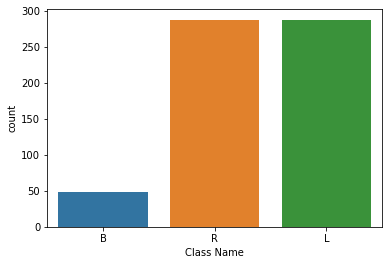

In [4]:
sns.countplot(df['Class Name'])

C:\Users\Aryan Maheshwari\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Left weight', ylabel='count'>

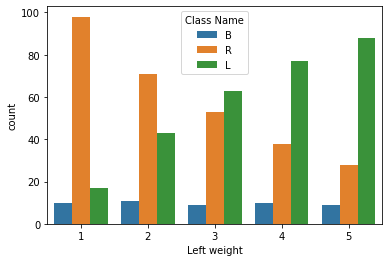

In [5]:
sns.countplot(df['Left weight'],hue = df['Class Name'])

C:\Users\Aryan Maheshwari\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Right weight', ylabel='count'>

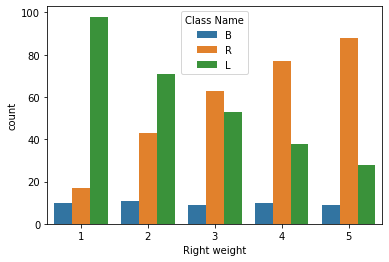

In [6]:
sns.countplot(df['Right weight'],hue = df['Class Name'])

In [7]:
from sklearn.model_selection import train_test_split
x=df.drop('Class Name', axis=1)
y=df[['Class Name']]
x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=0.3,random_state=42)

In [8]:
from sklearn.tree import DecisionTreeClassifier
clf_model=DecisionTreeClassifier(criterion="gini", random_state=42,max_depth=3)
clf_model.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=3, random_state=42)

In [9]:
y_predict = clf_model.predict(x_test)

In [10]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
accuracy_score(y_test,y_predict)

0.7021276595744681

In [11]:
target = list(df['Class Name'].unique())
feature_names = list(x.columns)

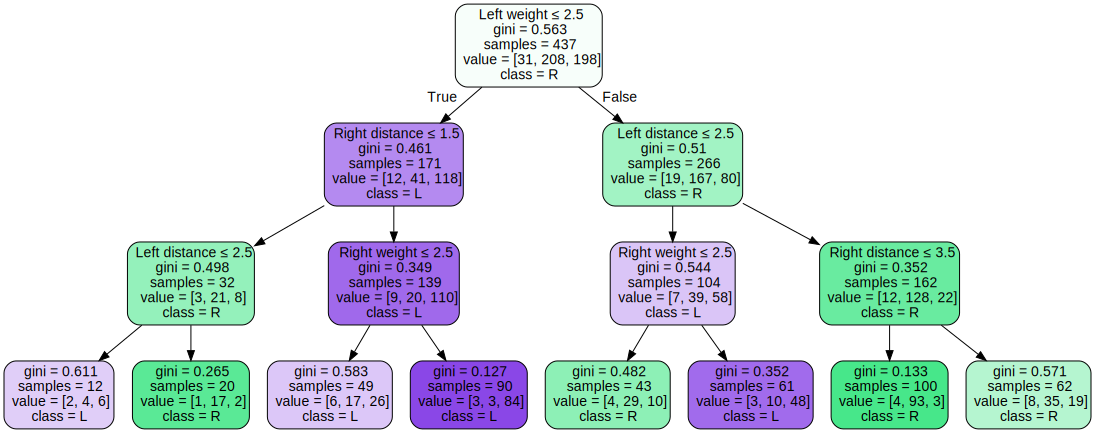

In [12]:
from sklearn import tree
dot_data=tree.export_graphviz(clf_model, out_file=None, feature_names=feature_names,class_names=target,filled=True, rounded=True,special_characters=True)
graph=graphviz.Source(dot_data)
graph